In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
import matplotlib.pyplot as plt
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
import math

In [2]:
base_url = "https://nextspaceflight.com/launches/past/"
last_page = 20

In [3]:
options = Options()
options.add_argument("--headless=new")
browser = webdriver.Chrome(options=options)

launch_data = []
for page in range(1, last_page + 1):
    browser.get(f"{base_url}?page={page}")
    cards = browser.find_elements(By.CLASS_NAME, "mdl-card")
    for card in cards:
        company = card.find_element(By.CLASS_NAME, "mdl-card__title-text").text
        rocket_and_payload = card.find_element(By.CLASS_NAME, "header-style").text
        date_and_location = card.find_element(By.CLASS_NAME, "mdl-card__supporting-text").text
        details_url = card.find_element(By.CLASS_NAME, "mdc-button").get_attribute("href")
        border_color = card.value_of_css_property("border-top-color")

        if "rgba(69, 207, 93, 1)" == border_color:
            successful = "1" #Exito
        else:
            successful = "0" #Fracaso

        launch_dict = {
            'company': company,
            'rocket_and_payload': rocket_and_payload,
            'date_and_location': date_and_location,
            'details_url': details_url,
            'successful': successful
        }
        launch_data.append(launch_dict)
browser.quit()

df = pd.DataFrame(launch_data, columns=['company', 'rocket_and_payload', 'date_and_location', 'details_url', 'successful'])

In [ ]:
browser = webdriver.Chrome(options=options)
wait = WebDriverWait(browser, 10)


prices = []
leo_weights = []  
gto_weights = []  
rocket_heights = []
fairing_diameters = []
fairing_heights = []

for index in range(len(df.details_url)):
    print(f"Processing launch {index + 1}/{len(df.details_url)}")#pensar en quitar
    browser.get(df.details_url[index])

    details_els = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, "mdl-card__supporting-text")))
    details_texts = [el.text for el in details_els]

    price = 0.0
    leo_weight = 0
    gto_weight = 0
    rocket_h = 0.0
    fairing_d = 0.0
    fairing_h = 0.0

    if len(details_texts) > 1:
        parts = details_texts[1].split("\n")
        for part in parts:
            if "Price: " in part:
                price = part.replace("Price: $", "").replace(" million", "").strip()
                price = float(price)
            elif "Payload to LEO:" in part:
                leo_weight = part.replace("Payload to LEO:", "").replace("kg", "").strip()
                leo_weight = int(leo_weight.replace(',', ''))
            elif "Payload to GTO:" in part:
                gto_weight = part.replace("Payload to GTO:", "").replace("kg", "").strip()
                gto_weight = int(gto_weight.replace(',', ''))
            elif "Rocket Height:" in part:  
                rocket_h = part.replace("Rocket Height:", "").replace("m", "").strip()
                rocket_h = float(rocket_h)
            elif "Fairing Diameter:" in part:
                fairing_d = part.replace("Fairing Diameter:", "").replace("m", "").strip()
                fairing_d = float(fairing_d)
            elif "Fairing Height:" in part:
                fairing_h = part.replace("Fairing Height:", "").replace("m", "").strip()
                fairing_h = float(fairing_h)

   
    prices.append(price)
    leo_weights.append(leo_weight)
    gto_weights.append(gto_weight)
    rocket_heights.append(rocket_h)
    fairing_diameters.append(fairing_d)
    fairing_heights.append(fairing_h)

browser.quit()


df["price_million"] = prices
df["leo_weight_kg"] = leo_weights
df["gto_weight_kg"] = gto_weights
df["total_payload_kg"] = df["leo_weight_kg"] + df["gto_weight_kg"]
df["rocket_height_m"] = rocket_heights
df["fairing_diameter_m"] = fairing_diameters
df["fairing_height_m"] = fairing_heights

df

Processing launch 1/600
Processing launch 2/600
Processing launch 3/600
Processing launch 4/600
Processing launch 5/600
Processing launch 6/600
Processing launch 7/600
Processing launch 8/600
Processing launch 9/600
Processing launch 10/600
Processing launch 11/600
Processing launch 12/600
Processing launch 13/600
Processing launch 14/600
Processing launch 15/600
Processing launch 16/600
Processing launch 17/600
Processing launch 18/600
Processing launch 19/600
Processing launch 20/600
Processing launch 21/600
Processing launch 22/600
Processing launch 23/600
Processing launch 24/600
Processing launch 25/600
Processing launch 26/600
Processing launch 27/600
Processing launch 28/600
Processing launch 29/600
Processing launch 30/600
Processing launch 31/600
Processing launch 32/600
Processing launch 33/600
Processing launch 34/600
Processing launch 35/600
Processing launch 36/600
Processing launch 37/600
Processing launch 38/600
Processing launch 39/600
Processing launch 40/600
Processin

,company,rocket_and_payload,date_and_location,details_url,successful,price_million,leo_weight_kg,gto_weight_kg,total_payload_kg,rocket_height_m,fairing_diameter_m,fairing_height_m
0,SpaceX,Falcon 9 Block 5 | Nusantara Lima,"Thu Sep 11, 2025 22:56 GMT-3\nSLC-40, Cape Can...",https://nextspaceflight.com/launches/details/6907,1,69.75,22800,8300,31100,70.00,5.20,13.00
1,Roscosmos,Soyuz 2.1a | Progress MS-32,"Thu Sep 11, 2025 12:54 GMT-3\nSite 31/6, Baiko...",https://nextspaceflight.com/launches/details/7710,1,17.42,7500,0,7500,51.38,4.11,15.59
2,SpaceX,Falcon 9 Block 5 | Tranche 1 Transport Layer B,"Wed Sep 10, 2025 11:12 GMT-3\nSLC-4E, Vandenbe...",https://nextspaceflight.com/launches/details/7219,1,69.75,22800,8300,31100,70.00,5.20,13.00
3,CASC,Long March 7A | Yaogan 45,"Mon Sep 8, 2025 23:00 GMT-3\nLC-201, Wenchang ...",https://nextspaceflight.com/launches/details/7943,1,0.00,12000,7000,19000,58.00,4.20,12.40
4,Chinarocket,Jielong 3 | Geely Constellation Group 05,"Mon Sep 8, 2025 16:48 GMT-3\nOriental Spacepor...",https://nextspaceflight.com/launches/details/7942,1,0.00,1500,0,1500,31.00,3.35,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
595,Virgin Galactic,SpaceShipTwo | Galactic 02,"Thu Aug 10, 2023 11:17 AM GMT-4\nVMS Eve, Spac...",https://nextspaceflight.com/launches/details/7199,1,0.00,0,0,0,0.00,0.00,0.00
596,Galactic Energy,Ceres 1 | Lucky 7,"Thu Aug 10, 2023 12:03 AM GMT-4\nSite 95A, Jiu...",https://nextspaceflight.com/launches/details/7234,1,4.38,400,0,400,19.00,1.40,2.50
597,CASC,Long March 2C | 5 m S-SAR-02 (Huanjing-2F),"Tue Aug 8, 2023 6:53 PM GMT-4\nLC-9, Taiyuan S...",https://nextspaceflight.com/launches/details/7233,1,30.80,2850,1000,3850,42.00,3.35,8.37
598,SpaceX,Falcon 9 Block 5 | Starlink Group 6-20,"Mon Aug 7, 2023 11:57 PM GMT-4\nSLC-4E, Vanden...",https://nextspaceflight.com/launches/details/7179,1,69.75,22800,8300,31100,70.00,5.20,13.00


In [5]:
df.size
df.shape

(600, 12)

In [6]:
df["rocket"] = df["rocket_and_payload"].str.split("|").str[0]
df["payload"] = df["rocket_and_payload"].str.split("|").str[1]
df["date"] = df["date_and_location"].str.split("\n").str[0]
df["location"] = df["date_and_location"].str.split("\n").str[1]
df.drop(columns=["rocket_and_payload", "date_and_location"], inplace=True)
df

,company,details_url,successful,price_million,leo_weight_kg,gto_weight_kg,total_payload_kg,rocket_height_m,fairing_diameter_m,fairing_height_m,rocket,payload,date,location
0,SpaceX,https://nextspaceflight.com/launches/details/6907,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Nusantara Lima,"Thu Sep 11, 2025 22:56 GMT-3","SLC-40, Cape Canaveral SFS, Florida, USA"
1,Roscosmos,https://nextspaceflight.com/launches/details/7710,1,17.42,7500,0,7500,51.38,4.11,15.59,Soyuz 2.1a,Progress MS-32,"Thu Sep 11, 2025 12:54 GMT-3","Site 31/6, Baikonur Cosmodrome, Kazakhstan"
2,SpaceX,https://nextspaceflight.com/launches/details/7219,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Tranche 1 Transport Layer B,"Wed Sep 10, 2025 11:12 GMT-3","SLC-4E, Vandenberg SFB, California, USA"
3,CASC,https://nextspaceflight.com/launches/details/7943,1,0.00,12000,7000,19000,58.00,4.20,12.40,Long March 7A,Yaogan 45,"Mon Sep 8, 2025 23:00 GMT-3","LC-201, Wenchang Space Launch Site, China"
4,Chinarocket,https://nextspaceflight.com/launches/details/7942,1,0.00,1500,0,1500,31.00,3.35,0.00,Jielong 3,Geely Constellation Group 05,"Mon Sep 8, 2025 16:48 GMT-3","Oriental Spaceport Launch Ship (Area 1), China..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Virgin Galactic,https://nextspaceflight.com/launches/details/7199,1,0.00,0,0,0,0.00,0.00,0.00,SpaceShipTwo,Galactic 02,"Thu Aug 10, 2023 11:17 AM GMT-4","VMS Eve, Spaceport America, New Mexico, USA"
596,Galactic Energy,https://nextspaceflight.com/launches/details/7234,1,4.38,400,0,400,19.00,1.40,2.50,Ceres 1,Lucky 7,"Thu Aug 10, 2023 12:03 AM GMT-4","Site 95A, Jiuquan Satellite Launch Center, China"
597,CASC,https://nextspaceflight.com/launches/details/7233,1,30.80,2850,1000,3850,42.00,3.35,8.37,Long March 2C,5 m S-SAR-02 (Huanjing-2F),"Tue Aug 8, 2023 6:53 PM GMT-4","LC-9, Taiyuan Satellite Launch Center, China"
598,SpaceX,https://nextspaceflight.com/launches/details/7179,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Starlink Group 6-20,"Mon Aug 7, 2023 11:57 PM GMT-4","SLC-4E, Vandenberg SFB, California, USA"


In [7]:
def clean_date(scraped_date_string):
    months = {"Jan":"01", "Feb":"02", "Mar":"03", "Apr":"04", "May":"05", "Jun":"06",
              "Jul":"07", "Aug":"08", "Sep":"09", "Oct":"10", "Nov":"11", "Dec":"12"}
    parts = scraped_date_string.split(" ")
    month = parts[1]
    day = parts[2].replace(",", "")
    year = parts[3]
    return f"{year}/{months[month]}/{day}"

In [8]:
df["cleaned_date"] = df["date"].apply(clean_date)
df["year"] = df["cleaned_date"].str.split("/").str[0]
df["month"] = df["cleaned_date"].str.split("/").str[1]
df["day"] = df["cleaned_date"].str.split("/").str[2]
df.drop(columns=["date", "cleaned_date"], inplace=True)
df

,company,details_url,successful,price_million,leo_weight_kg,gto_weight_kg,total_payload_kg,rocket_height_m,fairing_diameter_m,fairing_height_m,rocket,payload,location,year,month,day
0,SpaceX,https://nextspaceflight.com/launches/details/6907,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Nusantara Lima,"SLC-40, Cape Canaveral SFS, Florida, USA",2025,09,11
1,Roscosmos,https://nextspaceflight.com/launches/details/7710,1,17.42,7500,0,7500,51.38,4.11,15.59,Soyuz 2.1a,Progress MS-32,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2025,09,11
2,SpaceX,https://nextspaceflight.com/launches/details/7219,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Tranche 1 Transport Layer B,"SLC-4E, Vandenberg SFB, California, USA",2025,09,10
3,CASC,https://nextspaceflight.com/launches/details/7943,1,0.00,12000,7000,19000,58.00,4.20,12.40,Long March 7A,Yaogan 45,"LC-201, Wenchang Space Launch Site, China",2025,09,8
4,Chinarocket,https://nextspaceflight.com/launches/details/7942,1,0.00,1500,0,1500,31.00,3.35,0.00,Jielong 3,Geely Constellation Group 05,"Oriental Spaceport Launch Ship (Area 1), China...",2025,09,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Virgin Galactic,https://nextspaceflight.com/launches/details/7199,1,0.00,0,0,0,0.00,0.00,0.00,SpaceShipTwo,Galactic 02,"VMS Eve, Spaceport America, New Mexico, USA",2023,08,10
596,Galactic Energy,https://nextspaceflight.com/launches/details/7234,1,4.38,400,0,400,19.00,1.40,2.50,Ceres 1,Lucky 7,"Site 95A, Jiuquan Satellite Launch Center, China",2023,08,10
597,CASC,https://nextspaceflight.com/launches/details/7233,1,30.80,2850,1000,3850,42.00,3.35,8.37,Long March 2C,5 m S-SAR-02 (Huanjing-2F),"LC-9, Taiyuan Satellite Launch Center, China",2023,08,8
598,SpaceX,https://nextspaceflight.com/launches/details/7179,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Starlink Group 6-20,"SLC-4E, Vandenberg SFB, California, USA",2023,08,7


In [9]:
rocket_volume = math.pi * (df["fairing_diameter_m"] / 2) ** 2 * df["rocket_height_m"]
fairing_volume = math.pi * (df["fairing_diameter_m"] / 2) ** 2 * df["fairing_height_m"] * (1/3)
df["volume_total_m3"] = round((rocket_volume + fairing_volume), 2)
df


,company,details_url,successful,price_million,leo_weight_kg,gto_weight_kg,total_payload_kg,rocket_height_m,fairing_diameter_m,fairing_height_m,rocket,payload,location,year,month,day,volume_total_m3
0,SpaceX,https://nextspaceflight.com/launches/details/6907,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Nusantara Lima,"SLC-40, Cape Canaveral SFS, Florida, USA",2025,09,11,1578.63
1,Roscosmos,https://nextspaceflight.com/launches/details/7710,1,17.42,7500,0,7500,51.38,4.11,15.59,Soyuz 2.1a,Progress MS-32,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2025,09,11,750.60
2,SpaceX,https://nextspaceflight.com/launches/details/7219,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Tranche 1 Transport Layer B,"SLC-4E, Vandenberg SFB, California, USA",2025,09,10,1578.63
3,CASC,https://nextspaceflight.com/launches/details/7943,1,0.00,12000,7000,19000,58.00,4.20,12.40,Long March 7A,Yaogan 45,"LC-201, Wenchang Space Launch Site, China",2025,09,8,860.82
4,Chinarocket,https://nextspaceflight.com/launches/details/7942,1,0.00,1500,0,1500,31.00,3.35,0.00,Jielong 3,Geely Constellation Group 05,"Oriental Spaceport Launch Ship (Area 1), China...",2025,09,8,273.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Virgin Galactic,https://nextspaceflight.com/launches/details/7199,1,0.00,0,0,0,0.00,0.00,0.00,SpaceShipTwo,Galactic 02,"VMS Eve, Spaceport America, New Mexico, USA",2023,08,10,0.00
596,Galactic Energy,https://nextspaceflight.com/launches/details/7234,1,4.38,400,0,400,19.00,1.40,2.50,Ceres 1,Lucky 7,"Site 95A, Jiuquan Satellite Launch Center, China",2023,08,10,30.53
597,CASC,https://nextspaceflight.com/launches/details/7233,1,30.80,2850,1000,3850,42.00,3.35,8.37,Long March 2C,5 m S-SAR-02 (Huanjing-2F),"LC-9, Taiyuan Satellite Launch Center, China",2023,08,8,394.78
598,SpaceX,https://nextspaceflight.com/launches/details/7179,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Starlink Group 6-20,"SLC-4E, Vandenberg SFB, California, USA",2023,08,7,1578.63


In [10]:
df.to_csv('launches.csv', index=False)

### Visualización de datos

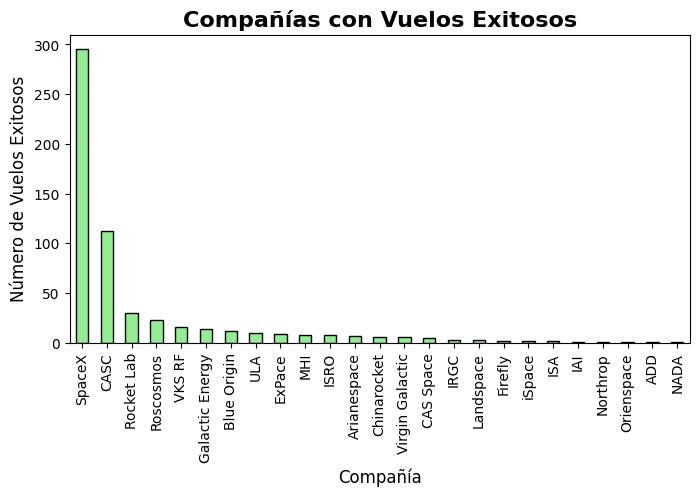


Vuelos exitosos por compañia:
company
SpaceX             295
CASC               112
Rocket Lab          30
Roscosmos           23
VKS RF              16
Galactic Energy     14
Blue Origin         12
ULA                 10
ExPace               9
MHI                  8
ISRO                 8
Arianespace          7
Chinarocket          6
Virgin Galactic      6
CAS Space            5
IRGC                 3
Landspace            3
Firefly              2
iSpace               2
ISA                  2
IAI                  1
Northrop             1
Orienspace           1
ADD                  1
NADA                 1
Name: count, dtype: int64


In [ ]:
#Vuelos exitosos por compañia

df_successful = df[df['successful'] == '1']

company_successful = df_successful['company'].value_counts()

plt.figure(figsize=(8, 4))
company_successful.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Compañías con Vuelos Exitosos', fontsize=16, fontweight='bold')
plt.xlabel('Compañía', fontsize=12)
plt.ylabel('Número de Vuelos Exitosos', fontsize=12)
plt.show()

print("\nVuelos exitosos por compañia:")
print(company_successful)

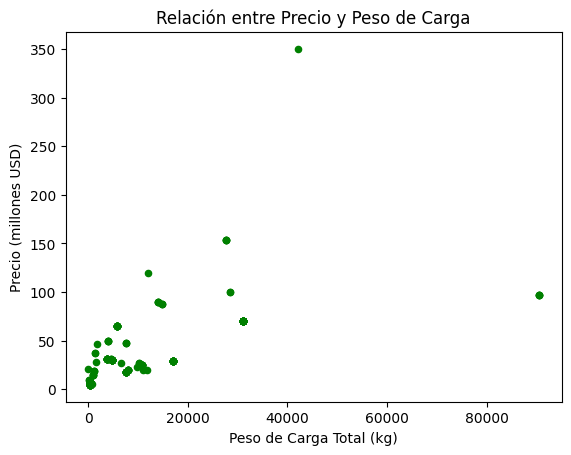

     price_million  total_payload_kg
422         350.00             42180
570         153.00             27750
76          153.00             27750
126         153.00             27750
350         153.00             27750
553         120.00             11990
79          100.00             28400
420         100.00             28400
550          97.00             90500
494          97.00             90500
300          97.00             90500
366          97.00             90500
482          90.00             14100
574          90.00             14100
69           90.00             14100
307          90.00             14100
173          88.00             14850
35           88.00             14850
357          88.00             14850
51           69.75             31100


In [ ]:
# Relacion entre precio y peso de carga

df_valor_carga = df[['price_million', 'total_payload_kg']]
df_valor_carga = df_valor_carga[df_valor_carga['price_million'] > 0]

df_valor_carga.plot(kind='scatter', x='total_payload_kg', y='price_million', color='green')
plt.title('Relación entre Precio y Peso de Carga')
plt.xlabel('Peso de Carga Total (kg)')
plt.ylabel('Precio (millones USD)')
plt.show()

print(df_valor_carga.sort_values(by='price_million', ascending=False).head(20))

#Se puede ver en el grafico que no hay una relacion clara entre el peso de la carga y el precio del lanzamiento.
#Hay lanzamientos con cargas pequeñas que son muy caras y otros con cargas grandes que son mas baratos.
#Aunque podria haber una ligera tendencia a que a mayor peso, mayor precio, no es concluyente.

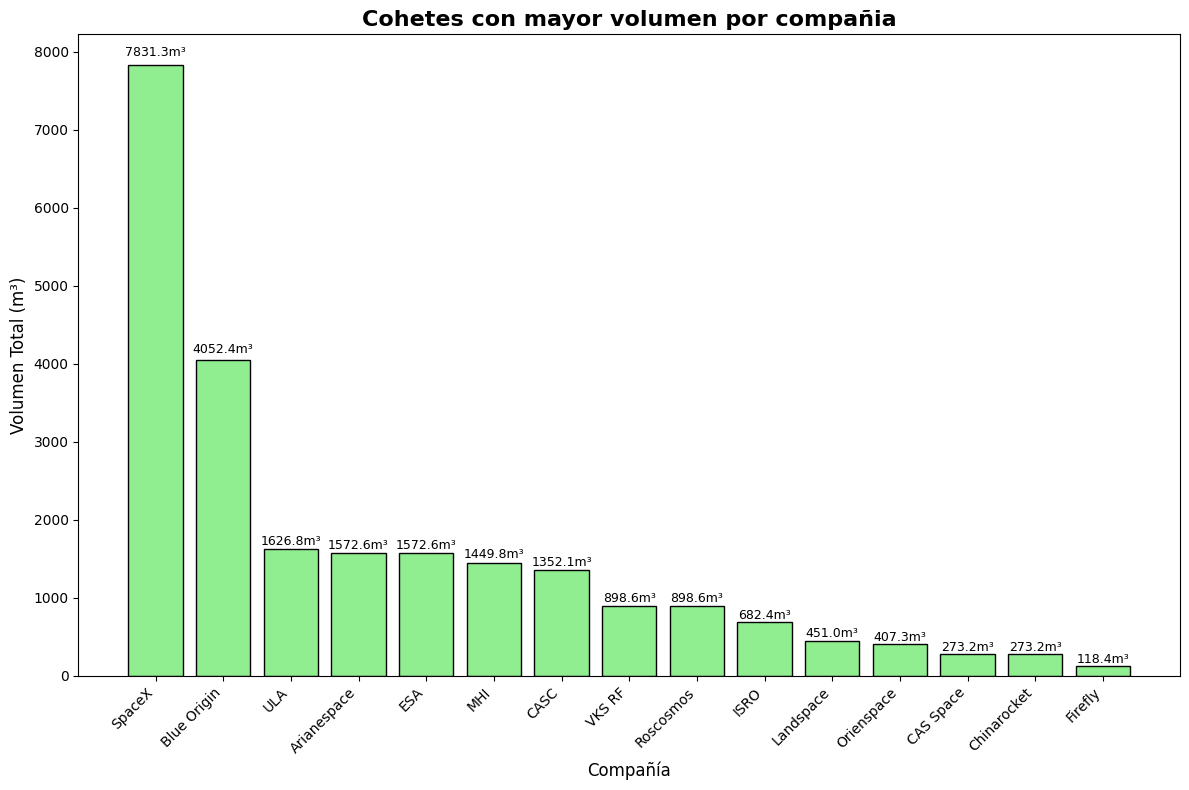

top 15 compañias con cohetes mas grandes por volumen total:


,company,volume_total_m3
0,SpaceX,7831.28
1,Blue Origin,4052.42
2,ULA,1626.82
3,Arianespace,1572.62
4,ESA,1572.62
5,MHI,1449.82
6,CASC,1352.10
7,VKS RF,898.64
8,Roscosmos,898.64
9,ISRO,682.35


In [ ]:
# Empresas con cohetes más grandes por volumen total

df_big_rockets = df.groupby('company')['volume_total_m3'].max().sort_values(ascending=False)
df_big_rockets = df_big_rockets.rename("volume_total_m3").reset_index()

df_big_rockets_display = df_big_rockets[['company', 'volume_total_m3']].head(15)


plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(df_big_rockets_display)), df_big_rockets_display['volume_total_m3'], color='lightgreen', edgecolor='black')


plt.title('Cohetes con mayor volumen por compañia', fontsize=16, fontweight='bold')
plt.xlabel('Compañía', fontsize=12)
plt.ylabel('Volumen Total (m³)', fontsize=12)


labels = [row['company'] for _, row in df_big_rockets_display.iterrows()]
plt.xticks(range(len(df_big_rockets_display)), labels, rotation=45, ha='right', fontsize=10)


for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01, f'{height:.1f}m³', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print('Top 15 compañias con cohetes mas grandes por volumen total:')
df_big_rockets_display

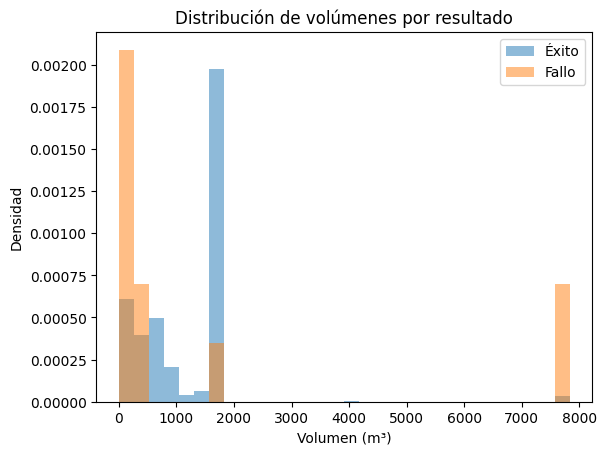

C:\Users\nicon\AppData\Local\Temp\ipykernel_20856\3274388907.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x_success.tolist(), x_fail.tolist()], labels=['Éxito', 'Fallo'], showfliers=True)


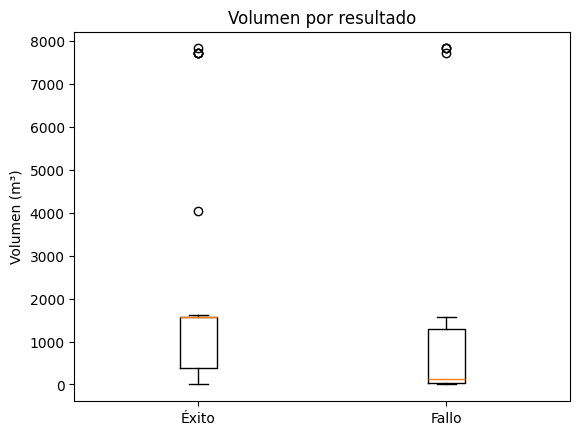

In [ ]:

df2 = df.copy()

x_success = df2.loc[df2['successful'] == '1', 'volume_total_m3']
x_fail = df2.loc[df2['successful'] == '0', 'volume_total_m3']

plt.figure()
x_success.plot(kind='hist', bins=30, density=True, alpha=0.5, label='Éxito')
x_fail.plot(kind='hist',    bins=30, density=True, alpha=0.5, label='Fallo')
plt.xlabel('Volumen (m³)'); plt.ylabel('Densidad')
plt.title('Distribución de volúmenes por resultado'); plt.legend()
plt.show()

plt.figure()
plt.boxplot([x_success.tolist(), x_fail.tolist()], labels=['Éxito', 'Fallo'], showfliers=True)
plt.ylabel('Volumen (m³)')
plt.title('Volumen por resultado')
plt.show()

#Se puede observar que los cohetes al tener un volumen muy bajo o muy alto tienen mas probabilidad de fallar.

Analisis de resultados


In [14]:
#df country evolution 
df_ce = df[['company', 'successful', 'location', 'year', 'month', 'day']].copy()
df_ce['country'] = df_ce['location'].str.split(', ').str[-1]
df_ce['country'] = df_ce['country'].replace('China Coastal Waters', 'China')

In [33]:
#df country evolution succeful 
df_ces = df_ce.copy()
df_ces['successful'] = df_ces['successful'].astype(int)

annual_country_stats = (
    df_ces.groupby(['year', 'country']).agg(total_launches=('successful', 'count'),successful_launches=('successful', 'sum')).reset_index())

annual_country_stats['success_rate_pct'] = (annual_country_stats['successful_launches'] / annual_country_stats['total_launches'] * 100).round(2)

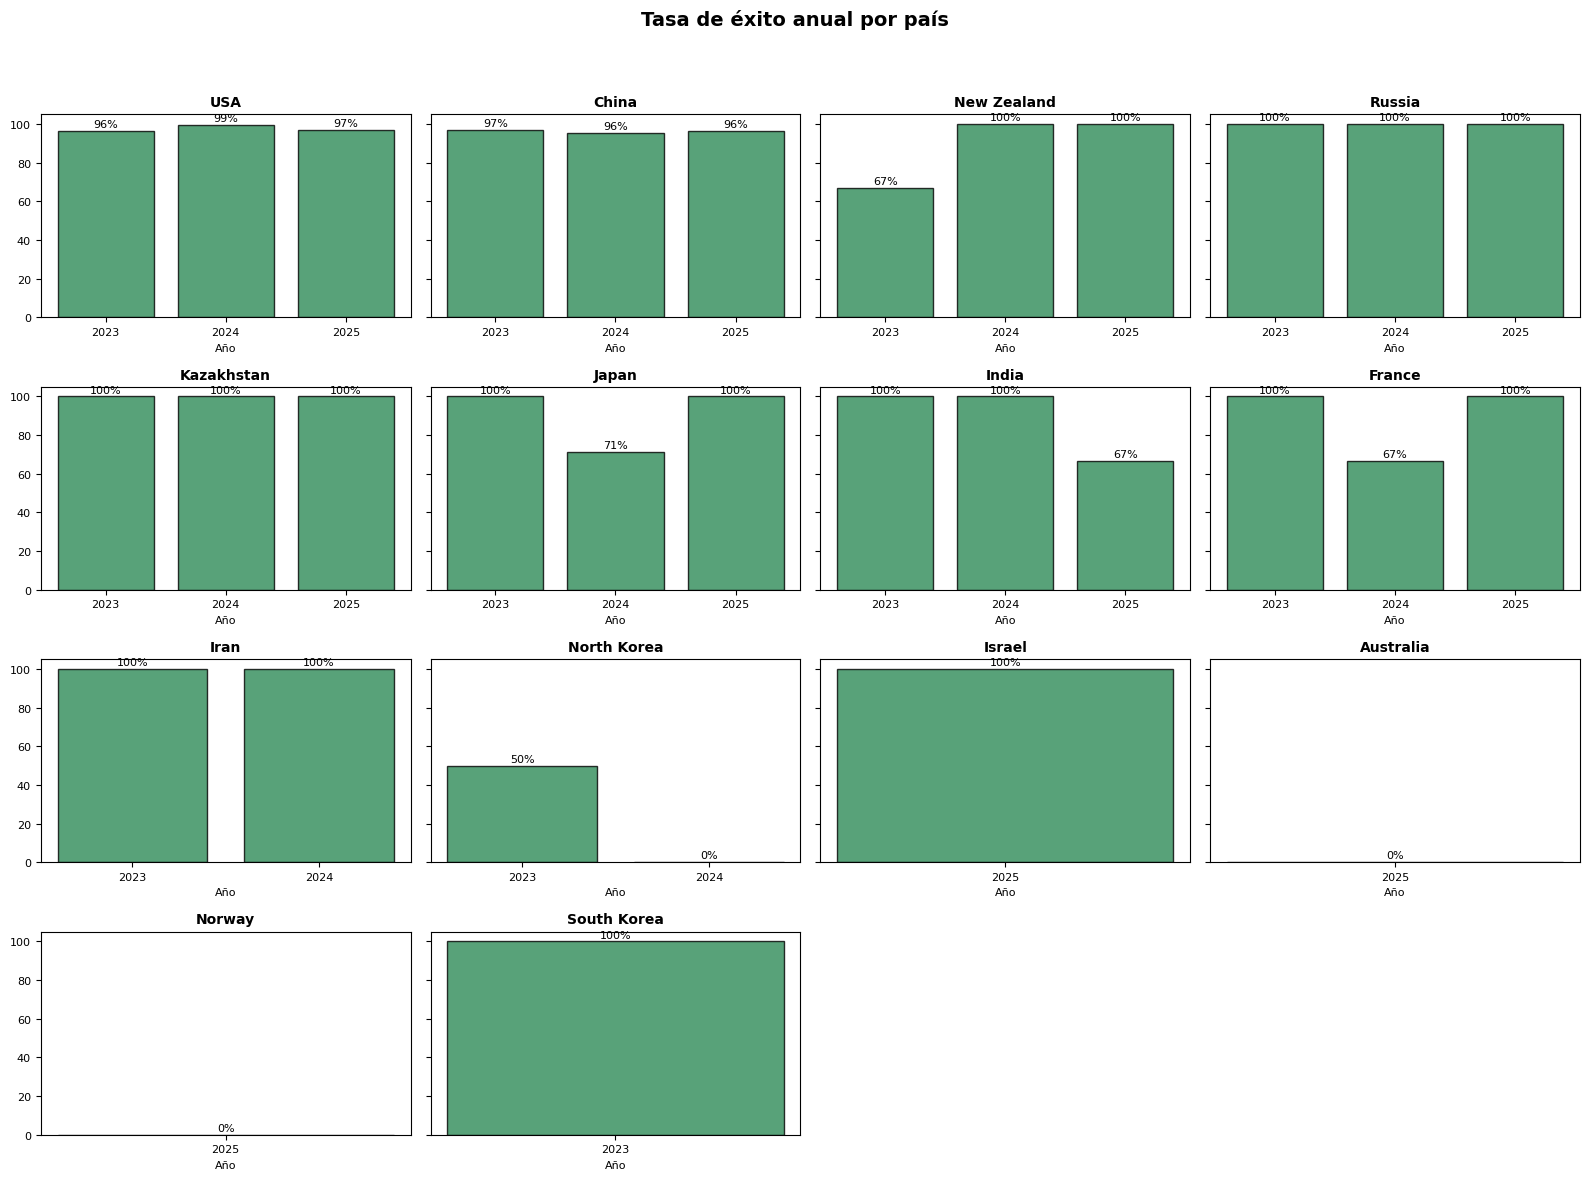

,year,country,total_launches,successful_launches,success_rate_pct
20,2024,USA,153,152,99.35
31,2025,USA,130,126,96.92
11,2024,China,68,65,95.59
22,2025,China,55,53,96.36
10,2023,USA,53,51,96.23
0,2023,China,35,34,97.14
17,2024,New Zealand,13,13,100.00
28,2025,New Zealand,12,12,100.00
19,2024,Russia,9,9,100.00
16,2024,Kazakhstan,8,8,100.00


In [34]:
acs_rate = annual_country_stats.copy()
acs_rate['year'].astype(int)

country_order_rate = (acs_rate.groupby('country')['total_launches'].sum().sort_values(ascending=False).index.tolist())

acs_rate = acs_rate[acs_rate['country'].isin(country_order_rate)]

n_countries = len(country_order_rate)
cols = 4
rows = math.ceil(n_countries / cols)
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3.0*rows), sharey=True)
axes = axes.flatten()

for i, country in enumerate(country_order_rate):
    ax = axes[i]
    sub = acs_rate[acs_rate['country'] == country].sort_values('year')

    ax.bar(sub['year'], sub['success_rate_pct'], color='seagreen', edgecolor='black', alpha=0.8)

    for x, y in zip(sub['year'], sub['success_rate_pct']):
        ax.text(x, y + 1, f"{y:.0f}%", ha='center', va='bottom', fontsize=8, color='black')

    ax.set_title(country, fontsize=10, fontweight='bold')
    ax.set_xlabel('Año', fontsize=8)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.set_ylim(0, 105)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Tasa de éxito anual por país', fontsize=14, fontweight='bold')
fig.tight_layout(rect=(0,0,1,0.95))
plt.show()

acs_rate.sort_values(['total_launches'], ascending=[False])

Promps utilizados

para que sirve el .replace en Python
y el .strip()?
como puedo separar este texto Thu Sep 18, 2025 06:30 CLST
SLC-40, Cape Canaveral SFS, Florida, USA  para obtener por un lado Thu Sep 18, 2025 06:30 y por otro lado CLST
SLC-40, Cape Canaveral SFS, Florida, USA 

si tengo un data frame y hay muchas compañias de cohetes pero yo solo quiero contar los que tienen succesful "1" para ponerlo en un grafico donde se muestren las compañias con el mayor numero de vuelos exitosos ¿como podria hacerlo? 

tengo un dataframe en el cual se encuentran varios datos, pero necesito hacer un grafico de los valores de price y total payload to kg, como puedo extraer estos dos datos y colocarlos en un grafico en python ?

se puede hacer sin numpy, solo con panda y matpltlib?

si funciona pero queda una columna sin nombre, como puedo hacer para que quede algo ahi